In [1]:

#Mongodb
#pip install pymongo
import pymongo


client = pymongo.MongoClient("mongodb://localhost:27017")


import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

#Random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)



df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [2]:
#rename the coulmn
df_1 = df.rename(columns={"arr_flights":"Number of flight arriving at airport", "arr_del15":"Number of flight more than 15 minutes late", "carrier_ct":"Number of flights delayed due to air carrier", "weather_ct":"Number of flights delayed due to weather", "nas_ct":"Number of flights delayed due to National Aviation System", "security_ct":"Number of flights delayed due to security", "late_aircraft_ct":"Number of flights delayed as a result of another flight on the same aircraft delayed", "arr_cancelled":"Number of flights cancelled", "arr_diverted":"Number of flights that were diverted", "arr_delay":"Total time of delayed flight", "carrier_delay":"Total time of delayed flight due to carrier", "weather_delay":"Total time of delayed flight due to weather", "nas_delay":"Total time of delayed flight due to national aviation system", "security_delay":"Total time of delayed flight due to security", "late_aircraft_delay":"Total number of time delayed flight as a result of a former flight on the same airplane being late"},inplace=True)

df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [3]:
df.shape

(101315, 21)

In [4]:
df.isnull().values.any()

True

In [5]:
#checking the null value
df.isnull().sum()

year                                                                                                    0
month                                                                                                   0
carrier                                                                                                 0
carrier_name                                                                                            0
airport                                                                                                 0
airport_name                                                                                            0
Number of flight arriving at airport                                                                  158
Number of flight more than 15 minutes late                                                            355
Number of flights delayed due to air carrier                                                          158
Number of flights delayed due to weather      

In [6]:
df[df.isnull().values.any(axis=1)]


,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
1552,2022,7,YV,Mesa Airlines Inc.,HSV,"Huntsville, AL: Huntsville International-Carl ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6285,2022,4,OO,SkyWest Airlines Inc.,LNK,"Lincoln, NE: Lincoln Airport",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6712,2022,4,YV,Mesa Airlines Inc.,MLB,"Melbourne, FL: Melbourne International",1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6739,2022,4,YV,Mesa Airlines Inc.,SHV,"Shreveport, LA: Shreveport Regional",1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6779,2022,4,YX,Republic Airline,GRB,"Green Bay, WI: Green Bay Austin Straubel Inter...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95552,2017,6,EV,ExpressJet Airlines Inc.,GTR,"Columbus, MS: Golden Triangle Regional",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96410,2017,5,DL,Delta Air Lines Inc.,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97118,2017,5,VX,Virgin America,SLC,"Salt Lake City, UT: Salt Lake City International",1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97445,2017,4,DL,Delta Air Lines Inc.,BMI,"Bloomington/Normal, IL: Central Il Regional Ai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#using fillna method for replacing missing value with zero

#df = df.fillna({'carrier_name':0, 'Number of flight arriving at airport':0, 'Number of flight more than 15 minutes late':0, 'Total time of delayed flight due to carrier':0, 'Total time of delayed flight due to weather':0, 'Total time of delayed flight due to national aviation system':0, 'Total time of delayed flight due to security':0, 'Total number of time delayed flight as a result of a former flight on the same airplane being late':0, 'Total time of delayed flight':0, 'Number of flights delayed due to air carrier':0, 'Number of flights delayed due to weather':0,'Number of flights delayed due to National Aviation System':0, 'Number of flights delayed due to security':0, 'Number of flights delayed as a result of another flight on the same aircraft delayed':0, 'Number of flights cancelled':0, 'Number of flights that were diverted':0})
#df.iloc[1552:101314]


#filling null value with mean
df = df.fillna(df.mean())
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [8]:
df.isnull().values.any()
df.isnull().sum()

year                                                                                                  0
month                                                                                                 0
carrier                                                                                               0
carrier_name                                                                                          0
airport                                                                                               0
airport_name                                                                                          0
Number of flight arriving at airport                                                                  0
Number of flight more than 15 minutes late                                                            0
Number of flights delayed due to air carrier                                                          0
Number of flights delayed due to weather                        

In [9]:
# Convert the 'Total time of delayed flight' column to float64 data type
df['Total time of delayed flight'] = df['Total time of delayed flight'].astype('float64')


df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [10]:


#drop column

#df = df.drop(columns=['carrier'])


# Convert the object dtype column to int64 data type
#df['carrier'] = df['carrier'].astype('category')
#df['carrier_name'] = df['carrier_name'].astype('category')
#df['airport'] = df['airport'].astype('category')
#df['airport_name'] = df['airport_name'].astype('category')

df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [11]:
#convert the minutes into hour

import math



for index, row in df.iterrows():
    df.loc[index, 'Total time of delayed flight in hour'] = math.floor(row['Total time of delayed flight'] // 60)
    

    

df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,2.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,27.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,25.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,10.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,41.0


In [12]:
# Create a new column called 'delayed' based on the values of the 'Total time of delayed flight in hour' column

df['Number of flight arrive on time'] = df['Number of flight arriving at airport'] - df['Number of flight more than 15 minutes late']  - df['Number of flights cancelled']
df['Delayed'] = df['Total time of delayed flight'].apply(lambda x: 0 if x == 0 else 1)
# Display the updated DataFrame
#print(df.head())
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Number of flight arrive on time,Delayed
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,2.0,31.0,1
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,27.0,53.0,1
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,25.0,100.0,1
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,10.0,57.0,1
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,41.0,143.0,1


In [13]:
# Check if the 'delayed' column contains any 0 values
if 0 in df['Delayed'].values:
    print("The 'delayed' column contains 0 values.")
else:
    print("The 'delayed' column does not contain any 0 values.")

The 'delayed' column contains 0 values.


In [14]:

# Filter the DataFrame to show only rows where the 'delayed' column contains 0
delayed_0 = df[df['Delayed'] == 0]

# Display the filtered DataFrame
delayed_0

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Number of flight arrive on time,Delayed
43,2022,7,9E,Endeavor Air Inc.,GNV,"Gainesville, FL: Gainesville Regional",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
53,2022,7,9E,Endeavor Air Inc.,ITH,"Ithaca/Cortland, NY: Ithaca Tompkins Regional",10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0
220,2022,7,AS,Alaska Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0
503,2022,7,F9,Frontier Airlines Inc.,BMI,"Bloomington/Normal, IL: Central Il Regional Ai...",13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0
507,2022,7,F9,Frontier Airlines Inc.,BTV,"Burlington, VT: Burlington International",9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101011,2017,1,OO,SkyWest Airlines Inc.,GSO,"Greensboro/High Point, NC: Piedmont Triad Inte...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
101049,2017,1,OO,SkyWest Airlines Inc.,MEM,"Memphis, TN: Memphis International",9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0
101131,2017,1,UA,United Air Lines Inc.,BTV,"Burlington, VT: Burlington International",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
101132,2017,1,UA,United Air Lines Inc.,BUF,"Buffalo, NY: Buffalo Niagara International",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [15]:

# Filter the DataFrame to show only rows where the 'delayed' column contains 1
delayed_1 = df[df['Delayed'] == 1]

# Display the filtered DataFrame
delayed_1

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Number of flight arrive on time,Delayed
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.00,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,2.0,31.0,1
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.00,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,27.0,53.0,1
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.00,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,25.0,100.0,1
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.00,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,10.0,57.0,1
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.00,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,41.0,143.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101310,2017,1,WN,Southwest Airlines Co.,SNA,"Santa Ana, CA: John Wayne Airport-Orange County",1576.0,484.0,108.28,1.27,102.71,0.00,271.74,34.0,2.0,21762.0,4745.0,102.0,3468.0,0.0,13447.0,362.0,1058.0,1
101311,2017,1,WN,Southwest Airlines Co.,STL,"St. Louis, MO: St Louis Lambert International",2914.0,522.0,147.05,12.26,110.93,2.35,249.41,75.0,1.0,25536.0,7203.0,707.0,3860.0,65.0,13701.0,425.0,2317.0,1
101312,2017,1,WN,Southwest Airlines Co.,TPA,"Tampa, FL: Tampa International",2390.0,447.0,140.36,17.54,79.95,0.46,208.69,29.0,2.0,24203.0,6666.0,1817.0,3389.0,13.0,12318.0,403.0,1914.0,1
101313,2017,1,WN,Southwest Airlines Co.,TUL,"Tulsa, OK: Tulsa International",404.0,74.0,26.29,0.28,5.20,0.00,42.22,6.0,0.0,2905.0,993.0,17.0,170.0,0.0,1725.0,48.0,324.0,1


In [16]:
delayed_0.describe()


,year,month,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Number of flight arrive on time,Delayed
count,5083.000000,5083.000000,5083.000000,5083.000000,5083.0,5083.0,5083.0,5083.0,5083.0,5083.000000,5083.000000,5083.0,5083.0,5083.0,5083.0,5083.0,5083.0,5083.0,5083.000000,5083.0
mean,2019.770018,6.004918,13.273264,2.250723,0.0,0.0,0.0,0.0,0.0,2.307692,0.046429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.714849,0.0
std,1.219202,3.202188,17.078985,11.210071,0.0,0.0,0.0,0.0,0.0,8.423239,0.323257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.985043,0.0
min,2017.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-58.073217,0.0
25%,2019.000000,4.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0
50%,2020.000000,5.000000,7.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0
75%,2020.000000,9.000000,18.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,0.0
max,2022.000000,12.000000,204.000000,58.073217,0.0,0.0,0.0,0.0,0.0,165.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.000000,0.0


In [17]:
delayed_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5083 entries, 43 to 101151
Data columns (total 24 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   year                                                                                                5083 non-null   int64  
 1   month                                                                                               5083 non-null   int64  
 2   carrier                                                                                             5083 non-null   object 
 3   carrier_name                                                                                        5083 non-null   object 
 4   airport                                                                                             5083 non-nu

In [18]:
delayed_1.describe()


,year,month,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Number of flight arrive on time,Delayed
count,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.000000,96232.00000,96232.000000,96232.0
mean,2019.502858,6.294143,353.081691,61.021776,19.432433,2.155362,18.144848,0.161594,21.127389,8.268176,0.811759,4018.702418,1388.950766,223.839891,882.573932,7.759701,1515.570604,66.48593,283.791739,1.0
std,1.573000,3.449844,963.084013,166.752528,48.033968,7.035960,59.766365,0.751819,64.462825,52.177873,3.476599,11977.512965,4029.069636,829.235881,3470.500301,45.383120,4741.516434,199.62439,794.688005,0.0
min,2017.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0
25%,2018.000000,3.000000,51.000000,6.000000,2.110000,0.000000,1.000000,0.000000,1.100000,0.000000,0.000000,330.000000,111.000000,0.000000,35.000000,0.000000,63.000000,5.00000,39.000000,1.0
50%,2019.000000,6.000000,94.000000,16.000000,5.900000,0.410000,3.590000,0.000000,4.400000,1.000000,0.000000,959.000000,354.000000,18.000000,135.000000,0.000000,289.000000,15.00000,78.000000,1.0
75%,2021.000000,9.000000,242.000000,42.000000,15.660000,1.820000,10.600000,0.000000,13.640000,4.000000,1.000000,2713.000000,1064.000000,145.000000,436.000000,0.000000,994.000000,45.00000,192.000000,1.0
max,2022.000000,12.000000,21931.000000,4176.000000,1147.000000,226.000000,1884.420000,58.690000,1531.810000,4951.000000,154.000000,429194.000000,151581.000000,28294.000000,112018.000000,3760.000000,147167.000000,7153.00000,19278.000000,1.0


In [19]:
delayed_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96232 entries, 0 to 101314
Data columns (total 24 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   year                                                                                                96232 non-null  int64  
 1   month                                                                                               96232 non-null  int64  
 2   carrier                                                                                             96232 non-null  object 
 3   carrier_name                                                                                        96232 non-null  object 
 4   airport                                                                                             96232 non-n

In [20]:
delayed_0.shape

(5083, 24)

In [21]:
delayed_1.shape

(96232, 24)

In [22]:
df.shape

(101315, 24)

<AxesSubplot:>

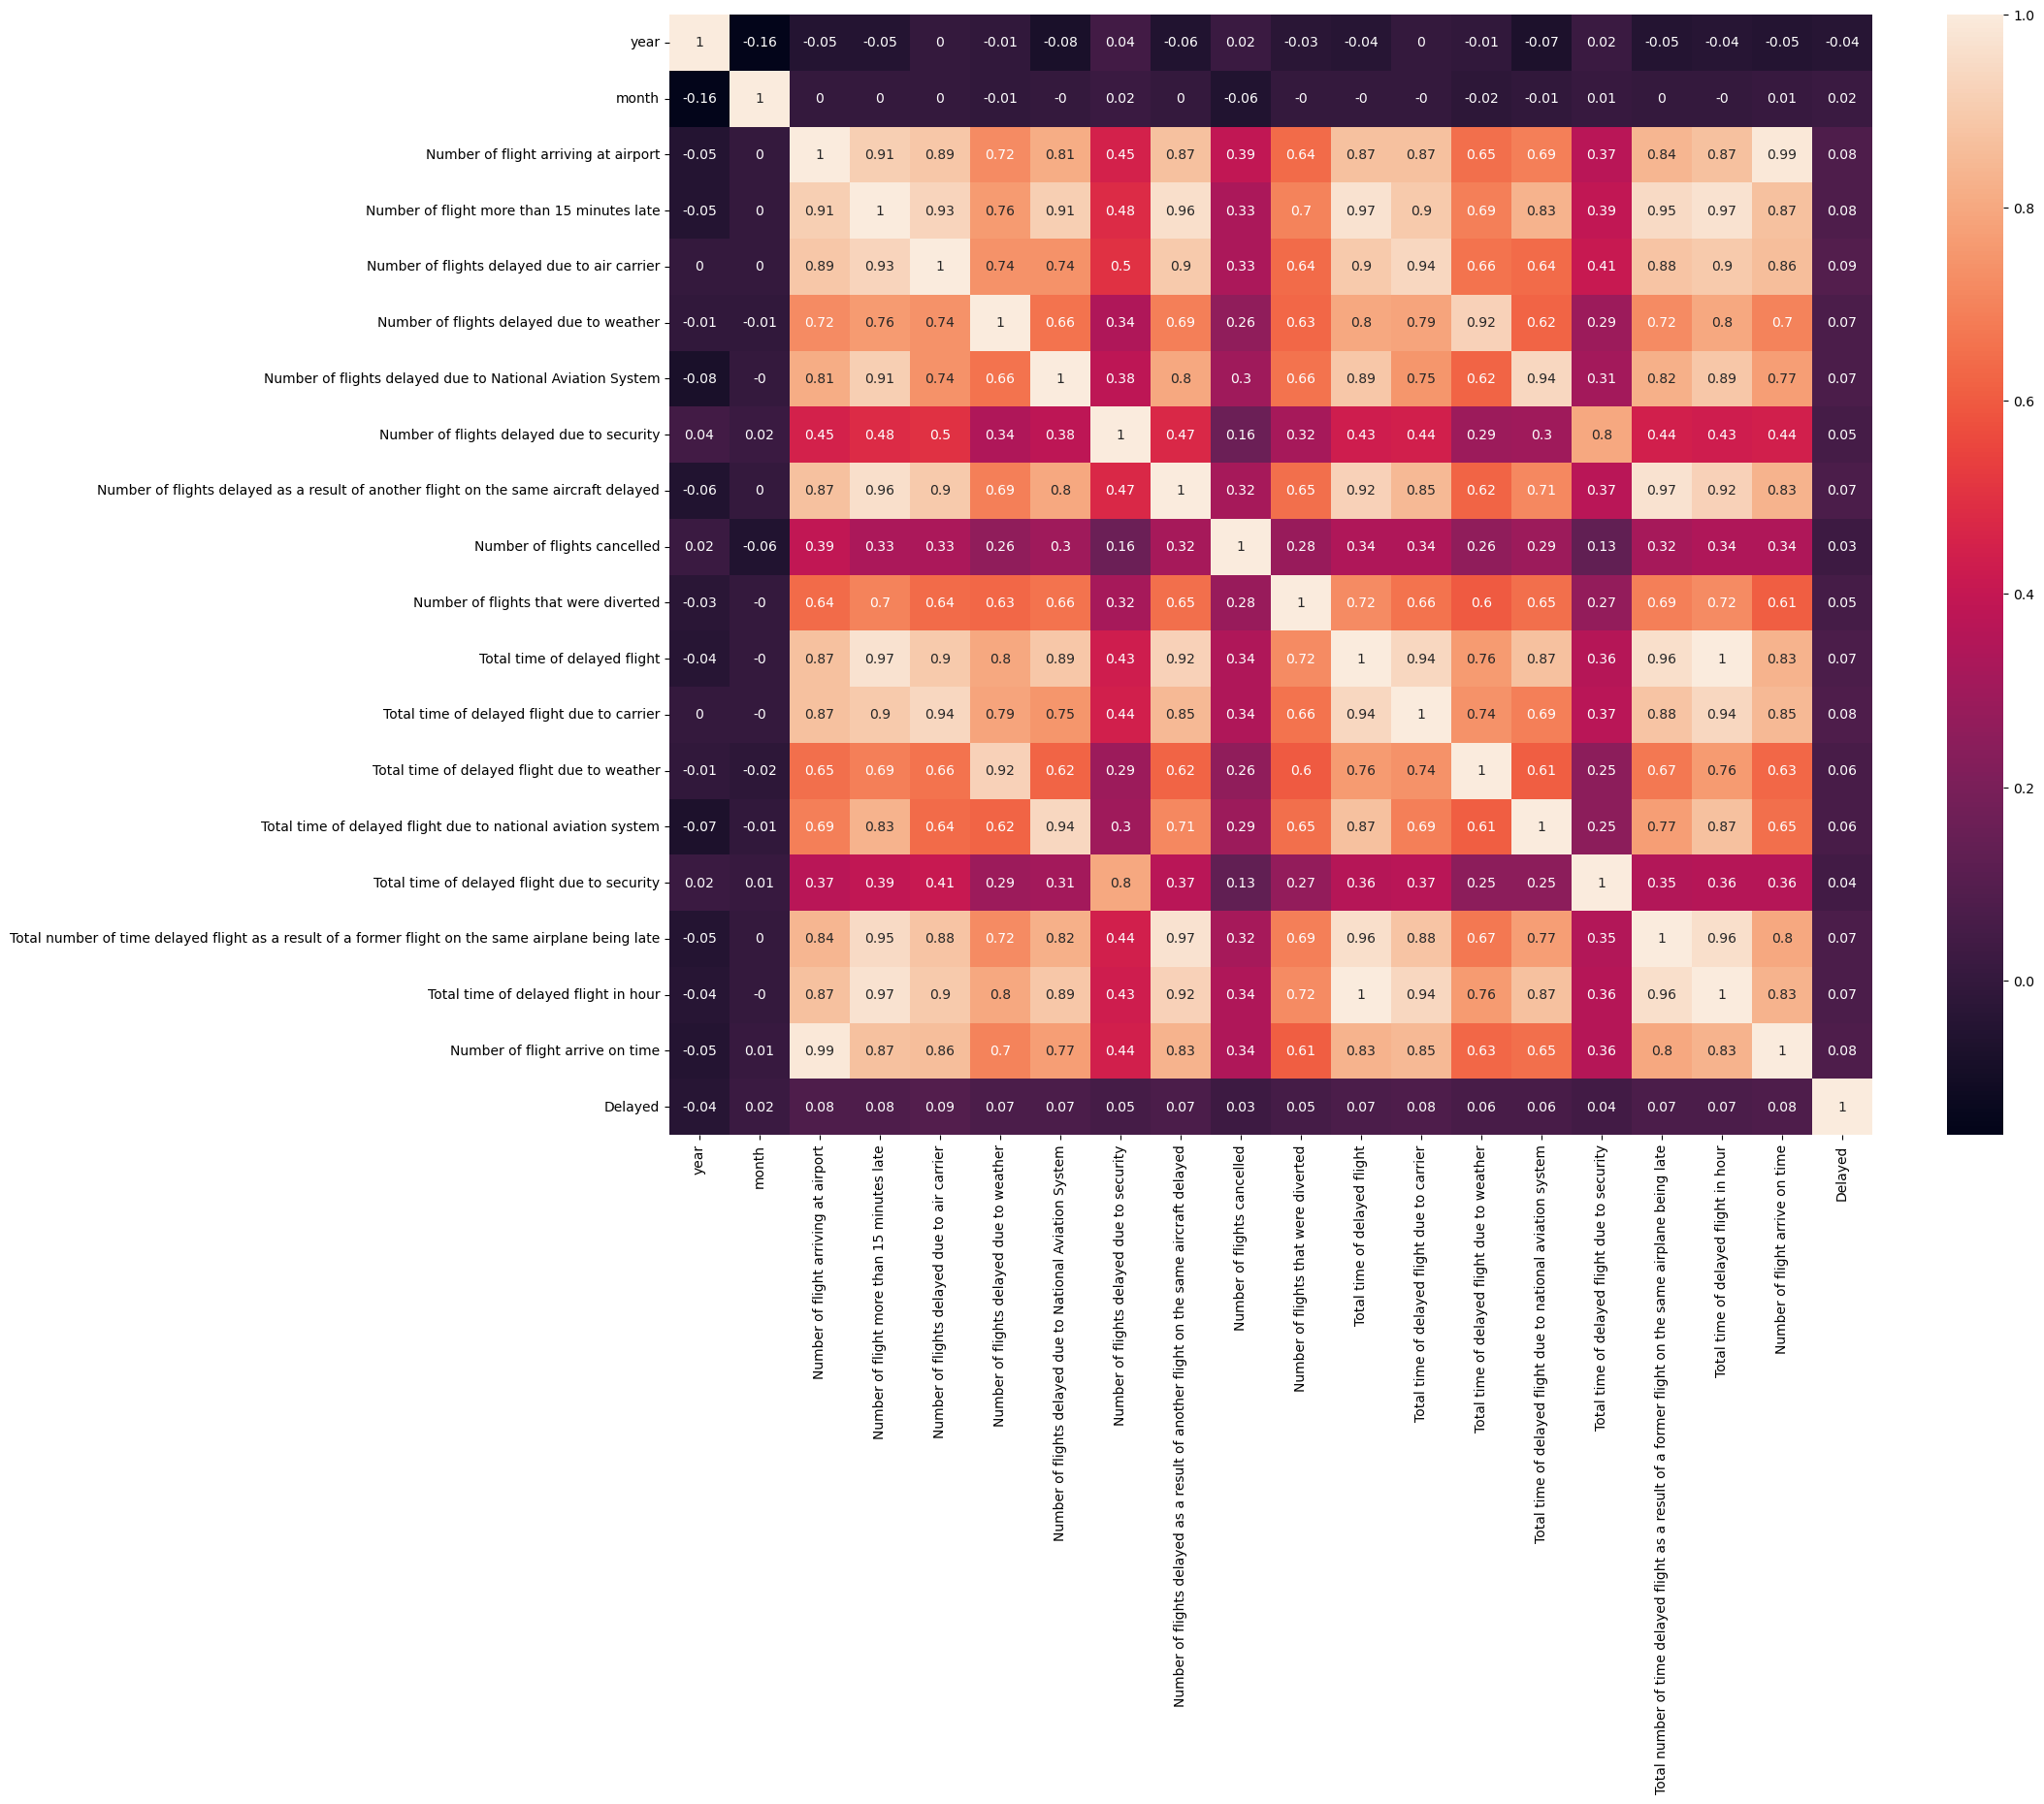

In [23]:
#correlation
corr=df.corr().round(2)
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [24]:
value_counts = df.value_counts()
print(value_counts)

year  month  carrier  carrier_name            airport  airport_name                                                 Number of flight arriving at airport  Number of flight more than 15 minutes late  Number of flights delayed due to air carrier  Number of flights delayed due to weather  Number of flights delayed due to National Aviation System  Number of flights delayed due to security  Number of flights delayed as a result of another flight on the same aircraft delayed  Number of flights cancelled  Number of flights that were diverted  Total time of delayed flight  Total time of delayed flight due to carrier  Total time of delayed flight due to weather  Total time of delayed flight due to national aviation system  Total time of delayed flight due to security  Total number of time delayed flight as a result of a former flight on the same airplane being late  Total time of delayed flight in hour  Number of flight arrive on time  Delayed
2017  1      AA       American Airlines Inc.  ABQ   

In [25]:
#Airport Name Count


airport_count = df['airport_name'].value_counts()
airport_count

Nashville, TN: Nashville International                        913
Pittsburgh, PA: Pittsburgh International                      913
Raleigh/Durham, NC: Raleigh-Durham International              906
New Orleans, LA: Louis Armstrong New Orleans International    895
Detroit, MI: Detroit Metro Wayne County                       889
                                                             ... 
St. Augustine, FL: Northeast Florida Regional                   5
Williamsport, PA: Williamsport Regional                         3
Youngstown/Warren, OH: Youngstown-Warren Regional               1
Fort Collins/Loveland, CO: Northern Colorado Regional           1
Tokeen, AK: Tokeen Airport                                      1
Name: airport_name, Length: 384, dtype: int64

In [26]:
#Airlines Name Count


carrier_count = df['carrier_name'].value_counts()
carrier_count

SkyWest Airlines Inc.       14919
Delta Air Lines Inc.         9045
Envoy Air                    6753
American Airlines Inc.       6722
Allegiant Air                6682
United Air Lines Inc.        6517
Southwest Airlines Co.       6161
Frontier Airlines Inc.       5718
Mesa Airlines Inc.           5293
Endeavor Air Inc.            5172
Alaska Airlines Inc.         4784
Republic Airline             4607
PSA Airlines Inc.            4406
JetBlue Airways              4223
ExpressJet Airlines Inc.     3291
Spirit Air Lines             3100
ExpressJet Airlines LLC      1436
Hawaiian Airlines Inc.       1203
Horizon Air                   929
Virgin America                354
Name: carrier_name, dtype: int64

In [27]:
carrier_list = carrier_count.tolist()
carrier_array = carrier_count.values
carrier_array

array([14919,  9045,  6753,  6722,  6682,  6517,  6161,  5718,  5293,
        5172,  4784,  4607,  4406,  4223,  3291,  3100,  1436,  1203,
         929,   354], dtype=int64)

In [28]:
#selecting SkyWest Airlines Inc.

SkyWest_Airlines_Inc = df['carrier_name'] == 'SkyWest Airlines Inc.'

SkyWest_Airlines_Inc_df = df[SkyWest_Airlines_Inc]

In [29]:
SkyWest_Airlines_Inc_df

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Number of flight arrive on time,Delayed
1022,2022,7,OO,SkyWest Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",76.0,28.0,22.00,6.00,0.00,0.0,0.00,4.0,0.0,2884.0,2018.0,866.0,0.0,0.0,0.0,48.0,44.0,1
1023,2022,7,OO,SkyWest Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",329.0,44.0,41.00,1.00,1.00,0.0,1.00,1.0,2.0,2258.0,1990.0,86.0,58.0,0.0,124.0,37.0,284.0,1
1024,2022,7,OO,SkyWest Airlines Inc.,ABR,"Aberdeen, SD: Aberdeen Regional",62.0,7.0,6.00,1.00,0.00,0.0,0.00,0.0,0.0,446.0,425.0,21.0,0.0,0.0,0.0,7.0,55.0,1
1025,2022,7,OO,SkyWest Airlines Inc.,ACV,"Arcata/Eureka, CA: California Redwood Coast Hu...",184.0,14.0,10.00,1.00,1.00,0.0,2.00,9.0,3.0,1870.0,978.0,775.0,52.0,0.0,65.0,31.0,161.0,1
1026,2022,7,OO,SkyWest Airlines Inc.,ALB,"Albany, NY: Albany International",102.0,14.0,11.00,0.00,1.00,0.0,2.00,0.0,0.0,712.0,585.0,0.0,41.0,0.0,86.0,11.0,88.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101115,2017,1,OO,SkyWest Airlines Inc.,TVC,"Traverse City, MI: Cherry Capital",163.0,49.0,19.18,3.29,14.51,0.0,12.02,9.0,1.0,2862.0,1674.0,143.0,485.0,0.0,560.0,47.0,105.0,1
101116,2017,1,OO,SkyWest Airlines Inc.,TWF,"Twin Falls, ID: Joslin Field - Magic Valley Re...",89.0,18.0,0.87,2.35,12.47,0.0,2.30,1.0,0.0,1266.0,45.0,662.0,508.0,0.0,51.0,21.0,70.0,1
101117,2017,1,OO,SkyWest Airlines Inc.,TYS,"Knoxville, TN: McGhee Tyson",4.0,2.0,0.00,0.83,0.40,0.0,0.76,0.0,0.0,173.0,0.0,130.0,30.0,0.0,13.0,2.0,2.0,1
101118,2017,1,OO,SkyWest Airlines Inc.,XNA,"Fayetteville, AR: Northwest Arkansas Regional",141.0,41.0,9.58,0.15,10.43,0.0,20.84,3.0,1.0,3371.0,594.0,7.0,423.0,0.0,2347.0,56.0,97.0,1


In [30]:
x=df.iloc[:,0:23].values #taken first to last column
y=df.iloc[:,23].values #have taken only last column

In [31]:
x

array([[2022, 7, '9E', ..., 0.0, 2.0, 31.0],
       [2022, 7, '9E', ..., 501.0, 27.0, 53.0],
       [2022, 7, '9E', ..., 589.0, 25.0, 100.0],
       ...,
       [2017, 1, 'WN', ..., 12318.0, 403.0, 1914.0],
       [2017, 1, 'WN', ..., 1725.0, 48.0, 324.0],
       [2017, 1, 'WN', ..., 5307.0, 117.0, 230.0]], dtype=object)

In [32]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Total time of delayed flight in hour,Number of flight arrive on time,Delayed
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,2.0,31.0,1
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,27.0,53.0,1
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,25.0,100.0,1
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,10.0,57.0,1
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,41.0,143.0,1


In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder_carrier = LabelEncoder() #label encoding
label_encoder_carrier_name = LabelEncoder()
label_encoder_airport = LabelEncoder()
label_encoder_airport_name = LabelEncoder()
x[:,2] = label_encoder_carrier.fit_transform(x[:,2])
x[:,3] = label_encoder_carrier_name.fit_transform(x[:,3])
x[:,4] = label_encoder_airport.fit_transform(x[:,4])
x[:,5] = label_encoder_airport_name.fit_transform(x[:,5])



In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)
x_standard[0]

array([ 1.59393273,  0.20950698, -1.60341264, -0.86618564, -1.81002693,
       -1.66931822, -0.32184746, -0.34392349, -0.37309798, -0.15236212,
       -0.29383206, -0.20923501, -0.3185624 , -0.15655384, -0.22791952,
       -0.31505795, -0.31009465, -0.23419071, -0.24508474, -0.16651659,
       -0.3107233 , -0.31344355, -0.30764966])

In [36]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x) #using MinMaxScaler
norm

MinMaxScaler()

In [37]:
x_normalization = norm.transform(x) #normalizing
x_normalization

array([[1.00000000e+00, 5.45454545e-01, 0.00000000e+00, ...,
        0.00000000e+00, 2.79602964e-04, 4.60658253e-03],
       [1.00000000e+00, 5.45454545e-01, 0.00000000e+00, ...,
        3.40429580e-03, 3.77464001e-03, 5.74435232e-03],
       [1.00000000e+00, 5.45454545e-01, 0.00000000e+00, ...,
        4.00225594e-03, 3.49503705e-03, 8.17504233e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.88888889e-01, ...,
        8.37008297e-02, 5.63399972e-02, 1.01989333e-01],
       [0.00000000e+00, 0.00000000e+00, 8.88888889e-01, ...,
        1.17213778e-02, 6.71047113e-03, 1.97596075e-02],
       [0.00000000e+00, 0.00000000e+00, 8.88888889e-01, ...,
        3.60610735e-02, 1.63567734e-02, 1.48982275e-02]])

In [38]:

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_normalization, y, test_size=0.3, random_state=0)

# Create a Random Forest classifier object
#rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [39]:
x_test.shape

(30395, 23)

In [40]:
y_test.shape

(30395,)

In [41]:
#Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [42]:

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [43]:

#Predict the response for test dataset
y_pred = clf.predict(x_test)

y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [44]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy_d:",metrics.accuracy_score(y_test, y_pred))

Accuracy_d: 1.0


In [45]:
#Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1473
           1       1.00      1.00      1.00     28922

    accuracy                           1.00     30395
   macro avg       1.00      1.00      1.00     30395
weighted avg       1.00      1.00      1.00     30395



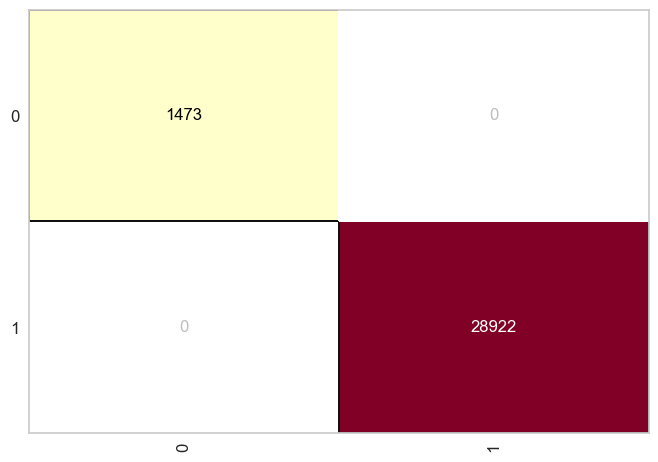

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

random_forest_1 = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 0)
random_forest_1.fit(x_train, y_train)

predict_1 = random_forest_1.predict(x_test)

cm_3 = ConfusionMatrix(random_forest_1)
cm_3.fit(x_train, y_train)
cm_3.score(x_test, y_test)

classification_clf_3 = (classification_report(y_test, predict_1))
print(classification_clf_3)



In [48]:
#knn

              precision    recall  f1-score   support

           0       0.36      0.09      0.15      1473
           1       0.96      0.99      0.97     28922

    accuracy                           0.95     30395
   macro avg       0.66      0.54      0.56     30395
weighted avg       0.93      0.95      0.93     30395



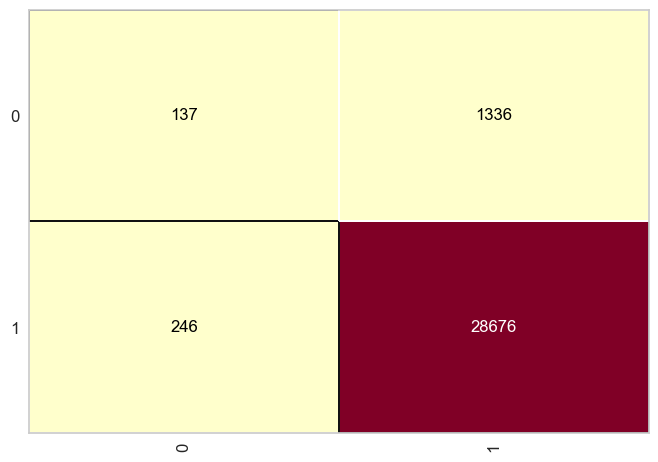

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'minkowski', p=2)

k_list = list(range(1,31))
k_values = dict(n_neighbors = k_list)


from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')
grid.fit(x_train, y_train)



grid.best_params_

grid.best_score_

knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)


predict_4 = knn.predict(x_test)


cm_4 = ConfusionMatrix(knn)
cm_4.fit(x_train, y_train)
cm_4.score(x_test, y_test)

classification_knn = (classification_report(y_test, predict_4))
print(classification_knn)




In [50]:
data = df.to_dict(orient = "records") #converting data into dictionary
db = client.Delay_prediction_of_airlines
db.Delay_prediction_of_airlines.insert_many(data)